In [3]:
import pandas as pd
import requests
import json
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus
from pandas.io.json import json_normalize
import xml.etree.ElementTree as ET
from bs4 import BeautifulSoup
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

In [4]:
print('hello world')

hello world


# SOCAR Greencar 좌표기반 차고지 목록 조회

In [5]:
# url = 'https://apis.data.go.kr/1613000/CarSharingInfoService/getCarZoneListByCoord'
# serviceKey = 'djdFO%2B%2FRk8lTleGKjsqNAoM3Kwr%2FbVQHhI%2FSmEBF95sXizBNisQXEUbT6VIbwssaY%2FVqJXcE22eVk%2B%2B2qrx1xw%3D%3D'
# api_key_decode = requests.utils.unquote(serviceKey)
# queryParams = '?' + urlencode({quote_plus('serviceKey') : api_key_decode,
#                                quote_plus('pageNo') : '1',
#                                quote_plus('numOfRows') : '10',
#                                quote_plus('_type') : 'json',
#                                quote_plus('latitude') : '37.553638',
#                                quote_plus('longitude') : '126.975494',
#                                quote_plus('radius') : '2'})


# response = urlopen(url + queryParams)
# print(response)
#   

In [6]:
# json_file = json.loads(json_api)
# json_file

# 서울시 나눔카 리스트 정보 

In [7]:
ls

2022-06-17_강수확률_기온_하늘상태_데이터.csv
2022-06-20_강수확률_기온_하늘상태_데이터.csv
README.md
crawling_weather.ipynb
ml-socar_greencar.ipynb
seoul_municipalities_geo_simple.json
~$청41_단기예보 조회서비스_오픈API활용가이드_최종.docx
기상청41_단기예보 조회서비스_오픈API활용가이드_격자_위경도(20220103).xlsx
기상청41_단기예보 조회서비스_오픈API활용가이드_최종.docx
서울시_나눔카_거점리스트_정보.csv


In [8]:
pwd

'/Users/richardpark/AISchool/ml/socar_greecar_ml'

In [3]:
nanum_car_list_df = pd.read_csv("./서울시_나눔카_거점리스트_정보.csv", encoding='cp949')
nanum_car_list_df

위도        경도  거점ID 전기차 여부 TO: 혼합차량 EV: 전기차 GA: 가솔린차  \
0     37.60972  127.0306   493                               GA   
1     37.53168  126.9697  2409                               GA   
2     37.57964  127.0155  2270                               GA   
3     37.55092  126.9440   629                               GA   
4     37.56968  126.9796   166                               GA   
...        ...       ...   ...                              ...   
1865  37.49413  126.9237   535                               GA   
1866  37.49118  126.8831   124                               GA   
1867  37.49327  126.9336  2017                               EV   
1868  37.55980  127.0337   993                               GA   
1869  37.48596  126.8861   245                               GA   

                      주소          거점명  
0       서울 강북구 미아동 42-56  하이마트 미아사거리점  
1       서울 용산구 한강로2가 424    아모레퍼시픽 본사  
2        서울 종로구 숭인동 7-12          창신역  
3      서울 마포구 대흥동 산 1-30        서강대학교  
4         서울 종로구 서린동 132    광화문역 5번출구  
...                  ...          ...  
1865     서울 동작구 신대방동 425        보라매병원  
1866   서울 구로구 구로동 704-12     고대구로병원 앞  
1867  서울 동작구 상도동 301-115      당곡중학교 뒤  
1868   서울 성동구 행당동 293-11   왕십리역 10번출구  
1869   서울 구로구 구로동 806-68         남구로역  

[1870 rows x 6 columns]

In [55]:
nanum_car_list_df['주소'].value_counts()

서울 영등포구 당산동5가 9-2     4
서울 강남구 대치동 890-20     4
서울 송파구 신천동 29         4
서울 성동구 행당동 4-12       3
서울 서초구 반포동 743-19     3
                     ..
서울 광진구 화양동 21-20      1
서울 서초구 우면동 689        1
서울 노원구 월계동 943        1
서울 강서구 화곡동 98-86      1
서울 동작구 상도동 301-115    1
Name: 주소, Length: 1507, dtype: int64

In [4]:
position_id = nanum_car_list_df['거점ID'].astype(object)
car_type = ['so', 'gr']
position_id

0        493
1       2409
2       2270
3        629
4        166
        ... 
1865     535
1866     124
1867    2017
1868     993
1869     245
Name: 거점ID, Length: 1870, dtype: object

In [5]:
api_key = '6678456b766c613838314741767576' 
url = f'http://openapi.seoul.go.kr:8088/{api_key}/xml/NanumcarCarList/1/5/12/gr'


response = requests.get(url)
soup = BeautifulSoup(response.text, "lxml")
soup

<?xml version="1.0" encoding="UTF-8"?><html><body><nanumcarcarlist><list_total_count>1</list_total_count><result><code>INFO-000</code><message>정상 처리되었습니다.</message></result><row><reservableallcnt>0</reservableallcnt><reservablecnt>0</reservablecnt><sponam>KT공항지사</sponam></row></nanumcarcarlist></body></html>

In [6]:
results = []
for id in tqdm(position_id, ncols = 110) :
    for type in car_type :
        
        url = f'http://openapi.seoul.go.kr:8088/{api_key}/json/NanumcarCarList/1/5/{id}/{type}'
        response = requests.get(url)
        
        if response.status_code == 200 :
            soup = BeautifulSoup(response.text, "lxml")
            message = soup.select_one("message").get_text()
    
            if (message == '정상 처리되었습니다.') :
                result = {}
                result['spot_name'] = soup.select_one('sponam').get_text()
                result['message'] = soup.select_one('message').get_text()
                result['reservable_all_count'] = soup.select_one('reservableallcnt').get_text()
                result['reservable_count'] = soup.select_one('reservablecnt').get_text()
                result['car_type'] = type
                results.append(result)
                        
print(results)



100%|█████████████████████████████████████████████████████████████████████| 1870/1870 [08:01<00:00,  3.88it/s]

[{'spot_name': '하이마트 미아사거리점', 'message': '정상 처리되었습니다.', 'reservable_all_count': '0', 'reservable_count': '0', 'car_type': 'gr'}, {'spot_name': '아모레퍼시픽 본사', 'message': '정상 처리되었습니다.', 'reservable_all_count': '3', 'reservable_count': '2', 'car_type': 'so'}, {'spot_name': '창신역', 'message': '정상 처리되었습니다.', 'reservable_all_count': '1', 'reservable_count': '1', 'car_type': 'gr'}, {'spot_name': '서강대학교', 'message': '정상 처리되었습니다.', 'reservable_all_count': '0', 'reservable_count': '0', 'car_type': 'so'}, {'spot_name': '광화문역 5번출구', 'message': '정상 처리되었습니다.', 'reservable_all_count': '0', 'reservable_count': '0', 'car_type': 'so'}, {'spot_name': '천호1동주민센터', 'message': '정상 처리되었습니다.', 'reservable_all_count': '1', 'reservable_count': '1', 'car_type': 'gr'}, {'spot_name': '서울역 10번출구(후암삼거리)', 'message': '정상 처리되었습니다.', 'reservable_all_count': '0', 'reservable_count': '0', 'car_type': 'so'}, {'spot_name': '서울역 10번출구(후암삼거리)', 'message': '정상 처리되었습니다.', 'reservable_all_count': '0', 'reservable_count': '0', 'car_

In [8]:
result_df = pd.DataFrame.from_dict(results)
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   spot_name             2546 non-null   object
 1   message               2546 non-null   object
 2   reservable_all_count  2546 non-null   object
 3   reservable_count      2546 non-null   object
 4   car_type              2546 non-null   object
dtypes: object(5)
memory usage: 99.6+ KB


In [9]:
b = nanum_car_list_df['주소'][0]
b = b.split()
b[1]

'강북구'

In [10]:
a = nanum_car_list_df[['위도','경도','거점명']]

for idx, juso in enumerate(nanum_car_list_df['주소']) :
    gu = juso.split()[1]
    a.loc[idx, '자치구'] = gu                 


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [11]:
for idx, spot1 in enumerate(nanum_car_list_df['거점명']) :
    for idx2,spot2 in enumerate(result_df['spot_name']) :
        if spot1 == spot2 :
            result_df.loc[idx2,'위도'] = a.loc[idx,'위도']
            result_df.loc[idx2,'경도'] = a.loc[idx,'경도']
            result_df.loc[idx2,'자치구'] = a.loc[idx,'자치구']

result_df

spot_name      message reservable_all_count reservable_count car_type  \
0     하이마트 미아사거리점  정상 처리되었습니다.                    0                0       gr   
1       아모레퍼시픽 본사  정상 처리되었습니다.                    3                2       so   
2             창신역  정상 처리되었습니다.                    1                1       gr   
3           서강대학교  정상 처리되었습니다.                    0                0       so   
4       광화문역 5번출구  정상 처리되었습니다.                    0                0       so   
...           ...          ...                  ...              ...      ...   
2541     고대구로병원 앞  정상 처리되었습니다.                    0                0       so   
2542      당곡중학교 뒤  정상 처리되었습니다.                    1                1       so   
2543   왕십리역 10번출구  정상 처리되었습니다.                    9                4       so   
2544         남구로역  정상 처리되었습니다.                    0                0       so   
2545         남구로역  정상 처리되었습니다.                    1                1       gr   

            위도        경도  자치구  
0     37.60972  127.0306  강북구  
1     37.53168  126.9697  용산구  
2     37.57964  127.0155  종로구  
3     37.55092  126.9440  마포구  
4     37.56968  126.9796  종로구  
...        ...       ...  ...  
2541  37.49118  126.8831  구로구  
2542  37.49327  126.9336  동작구  
2543  37.55980  127.0337  성동구  
2544  37.48596  126.8861  구로구  
2545  37.48596  126.8861  구로구  

[2546 rows x 8 columns]

In [13]:
result_df = result_df.astype({'reservable_all_count' : 'int'})
result_df = result_df.astype({'reservable_count' : 'int'})
result_df.dtypes

spot_name                object
message                  object
reservable_all_count      int64
reservable_count          int64
car_type                 object
위도                      float64
경도                      float64
자치구                      object
dtype: object

In [16]:
df_gu_car_sum = result_df.groupby("자치구")['reservable_count','reservable_all_count'].sum().reset_index()
display(df_gu_car_sum.info())
display(df_gu_car_sum)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   자치구                   27 non-null     object
 1   reservable_count      27 non-null     int64 
 2   reservable_all_count  27 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 776.0+ bytes


<ipython-input-16-b682e4f1d4fd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_gu_car_sum = result_df.groupby("자치구")['reservable_count','reservable_all_count'].sum().reset_index()


None

자치구  reservable_count  reservable_all_count
0      강남구               260                   386
1      강동구               189                   248
2      강북구                82                   103
3      강서구               282                   356
4      관악구               397                   531
5      광진구               212                   294
6   광진구화양동                 0                     0
7      구로구               295                   413
8   구로구개봉동                 0                     0
9      금천구                97                   134
10     노원구                52                    81
11     도봉구                77                   122
12    동대문구               139                   180
13     동작구               174                   231
14     마포구               245                   335
15    서대문구               118                   151
16     서초구               240                   337
17     성동구                92                   133
18     성북구               169                   225
19     송파구               247                   341
20     양천구               126                   162
21    영등포구               163                   206
22     용산구               216                   266
23     은평구               207                   303
24     종로구                88                   102
25      중구                60                    92
26     중랑구               220                   317

# 날씨 정보 

base time : 0200, 0500, 0800, 1100, 1400, 1700, 2000, 2300 (1일 8회)

In [17]:
ls

2022-06-17_강수확률_기온_하늘상태_데이터.csv
2022-06-20_강수확률_기온_하늘상태_데이터.csv
EDA-SOCAR.ipynb
ML-SOCAR.ipynb
README.md
bus_passenger.ipynb
seoul_municipalities_geo_simple.json
~$청41_단기예보 조회서비스_오픈API활용가이드_최종.docx
기상청41_단기예보 조회서비스_오픈API활용가이드_격자_위경도(20220103).xlsx
서울시_나눔카_거점리스트_정보.csv
기상청41_단기예보 조회서비스_오픈API활용가이드_최종.docx


In [18]:
# file_path = '/Users/richardpark/AISchool/mid-project/SOCAR/기상청41_단기예보 조회서비스_오픈API활용가이드_최종'

weather_df = pd.read_excel("./기상청41_단기예보 조회서비스_오픈API활용가이드_격자_위경도(20220103).xlsx")
weather_df

구분      행정구역코드      1단계   2단계    3단계  격자 X  격자 Y  경도(시)  경도(분)  경도(초)  \
0     kor  1100000000    서울특별시   NaN    NaN    60   127    126     58  48.03   
1     kor  1111000000    서울특별시   종로구    NaN    60   127    126     58  53.91   
2     kor  1111051500    서울특별시   종로구  청운효자동    60   127    126     58  14.35   
3     kor  1111053000    서울특별시   종로구    사직동    60   127    126     58  15.44   
4     kor  1111054000    서울특별시   종로구    삼청동    60   127    126     59   2.32   
...   ...         ...      ...   ...    ...   ...   ...    ...    ...    ...   
3783  kor  5013060000  제주특별자치도  서귀포시    대천동    52    32    126     28  46.47   
3784  kor  5013061000  제주특별자치도  서귀포시    중문동    51    32    126     26  12.40   
3785  kor  5013062000  제주특별자치도  서귀포시    예래동    50    32    126     23  59.67   
3786  kor  5019000000      이어도   NaN    NaN    28     8      0      0   0.00   
3787  kor  5019099000      이어도   NaN    NaN    28     8      0      0   0.00   

      위도(시)  위도(분)  위도(초)   경도(초/100)  위도(초/100)  위치업데이트  
0        37     33  48.85  126.980008  37.563569     NaN  
1        37     34  13.36  126.981642  37.570378     NaN  
2        37     35   2.89  126.970652  37.584137     NaN  
3        37     34  23.77  126.970956  37.573269     NaN  
4        37     34  56.73  126.983978  37.582425     NaN  
...     ...    ...    ...         ...        ...     ...  
3783     33     14  50.91  126.479575  33.247475     NaN  
3784     33     14  53.44  126.436778  33.248178     NaN  
3785     33     15   3.69  126.399908  33.251025     NaN  
3786      0      0   0.00    0.000000   0.000000     NaN  
3787      0      0   0.00    0.000000   0.000000     NaN  

[3788 rows x 16 columns]

In [19]:
weather_df = weather_df[weather_df['1단계']=='서울특별시'].drop(['위치업데이트'],axis=1)
# weather_df[weather_df['1단계']=='서울특별시']['2단계'].value_counts()

In [20]:
weather_df = weather_df[weather_df['1단계']=='서울특별시']
weather_df['2단계'].value_counts()

송파구     28
강남구     23
관악구     22
성북구     21
강서구     21
강동구     20
노원구     20
서초구     19
영등포구    19
양천구     19
종로구     18
성동구     18
은평구     17
마포구     17
구로구     17
중랑구     17
용산구     17
중구      16
동작구     16
광진구     16
도봉구     15
동대문구    15
서대문구    15
강북구     14
금천구     11
Name: 2단계, dtype: int64

In [20]:
# weather_df=weather_df.drop('위치업데이트',axis=1)

In [21]:
weather_df

구분      행정구역코드    1단계  2단계    3단계  격자 X  격자 Y  경도(시)  경도(분)  경도(초)  \
0    kor  1100000000  서울특별시  NaN    NaN    60   127    126     58  48.03   
1    kor  1111000000  서울특별시  종로구    NaN    60   127    126     58  53.91   
2    kor  1111051500  서울특별시  종로구  청운효자동    60   127    126     58  14.35   
3    kor  1111053000  서울특별시  종로구    사직동    60   127    126     58  15.44   
4    kor  1111054000  서울특별시  종로구    삼청동    60   127    126     59   2.32   
..   ...         ...    ...  ...    ...   ...   ...    ...    ...    ...   
447  kor  1174065000  서울특별시  강동구  성내제2동    62   126    127      7  53.71   
448  kor  1174066000  서울특별시  강동구  성내제3동    63   126    127      8   5.59   
449  kor  1174068500  서울특별시  강동구     길동    63   126      0      0   0.00   
450  kor  1174069000  서울특별시  강동구  둔촌제1동    63   126    127      8  19.79   
451  kor  1174070000  서울특별시  강동구  둔촌제2동    63   126    127      8  38.47   

     위도(시)  위도(분)  위도(초)   경도(초/100)  위도(초/100)  
0       37     33  48.85  126.980008  37.563569  
1       37     34  13.36  126.981642  37.570378  
2       37     35   2.89  126.970652  37.584137  
3       37     34  23.77  126.970956  37.573269  
4       37     34  56.73  126.983978  37.582425  
..     ...    ...    ...         ...        ...  
447     37     31  46.57  127.131586  37.529603  
448     37     31  24.14  127.134886  37.523372  
449      0      0   0.00  127.146168  37.539217  
450     37     31  14.70  127.138831  37.520750  
451     37     31  49.98  127.144019  37.530550  

[452 rows x 15 columns]

In [22]:
import datetime

In [22]:
def get_weather_info(date,time) :
    api_key_weather = 'djdFO%2B%2FRk8lTleGKjsqNAoM3Kwr%2FbVQHhI%2FSmEBF95sXizBNisQXEUbT6VIbwssaY%2FVqJXcE22eVk%2B%2B2qrx1xw%3D%3D'
    url = 'https://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getVilageFcst'
    api_key_decode = requests.utils.unquote(api_key_weather)
    base_date = date
    base_time = time
    
    for bst in tqdm(weather_df.index, ncols=110) :
        
        row = weather_df.loc[bst]
        
        nx = row['격자 X']
        ny = row['격자 Y']
        
        
        queryParams = '?' + urlencode({quote_plus('ServiceKey') : api_key_decode,
                                    quote_plus('pageNo') : '1',
                                    quote_plus('numOfRows') : '10',
                                    quote_plus('dataType') : 'JSON',
                                    quote_plus('base_date') : base_date, 
                                    quote_plus('base_time') : base_time, 
                                    quote_plus('nx') : nx,
                                    quote_plus('ny') : ny 
                                    })
        response_weather = urlopen(url + queryParams)
        json_api = response_weather.read()

        json_file = json.loads(json_api)
        weather_result_df = json_normalize(json_file['response']['body']['items']['item'])
        
        pop_df = weather_result_df[weather_result_df['category']=='POP']
        tmp_df = weather_result_df[weather_result_df['category']=='TMP']
        sky_df = weather_result_df[weather_result_df['category']=='SKY']

        pop_tmp_sky_df = pd.concat([pop_df,tmp_df,sky_df])
        
        current = datetime.datetime.now().date()
        
        if os.path.isfile(f'./{current}_강수확률_기온_하늘상태_데이터.csv') :
            pop_tmp_sky_df.to_csv(f'./{current}_강수확률_기온_하늘상태_데이터.csv', mode='a', header=False, index=False)
        else :
            pop_tmp_sky_df.to_csv(f'./{current}_강수확률_기온_하늘상태_데이터.csv', mode='a', index=False)

    
    return pop_tmp_sky_df

In [1]:
# base time : 0200, 0500, 0800, 1100, 1400, 1700, 2000, 2300 (1일 8회)
# import ssl

# ssl._create_default_https_context = ssl._create_unverified_context

# result = get_weather_info('20220620','1700')
# result



In [25]:
test = pd.read_csv('./2022-06-20_강수확률_기온_하늘상태_데이터.csv')
test.head(10)

baseDate  baseTime category  fcstDate  fcstTime  fcstValue  nx   ny
0  20220620       200      POP  20220620       300         20  60  127
1  20220620       200      TMP  20220620       300         22  60  127
2  20220620       200      SKY  20220620       300          3  60  127
3  20220620       200      POP  20220620       300         20  60  127
4  20220620       200      TMP  20220620       300         22  60  127
5  20220620       200      SKY  20220620       300          3  60  127
6  20220620       200      POP  20220620       300         20  60  127
7  20220620       200      TMP  20220620       300         22  60  127
8  20220620       200      SKY  20220620       300          3  60  127
9  20220620       200      POP  20220620       300         20  60  127

# 지도 시각화

In [27]:
import folium

In [28]:
longi_lati_df = nanum_car_list_df[['위도','경도']]
longi_lati_df

위도        경도
0     37.60972  127.0306
1     37.53168  126.9697
2     37.57964  127.0155
3     37.55092  126.9440
4     37.56968  126.9796
...        ...       ...
1865  37.49413  126.9237
1866  37.49118  126.8831
1867  37.49327  126.9336
1868  37.55980  127.0337
1869  37.48596  126.8861

[1870 rows x 2 columns]

In [29]:
lat = longi_lati_df["위도"]
long = longi_lati_df["경도"]
lat, long

(0       37.60972
 1       37.53168
 2       37.57964
 3       37.55092
 4       37.56968
           ...   
 1865    37.49413
 1866    37.49118
 1867    37.49327
 1868    37.55980
 1869    37.48596
 Name: 위도, Length: 1870, dtype: float64,
 0       127.0306
 1       126.9697
 2       127.0155
 3       126.9440
 4       126.9796
           ...   
 1865    126.9237
 1866    126.8831
 1867    126.9336
 1868    127.0337
 1869    126.8861
 Name: 경도, Length: 1870, dtype: float64)

### socar, green car 대여 가능 댓수 시각화

In [40]:
# 37.54723017686778, 126.99171024973694
lat = '37.54723017686778'
long = '126.99171024973694'
m = folium.Map(location=[lat, long], zoom_start=12, tiles="Stamen Toner")

geo_path = './seoul_municipalities_geo_simple.json'
print(geo_path)


import json
geo_json = json.load(open(geo_path, encoding="utf-8"))

folium.GeoJson(
    geo_json,
    name='seoul_municipalities'
).add_to(m)



for bst in tqdm(result_df.index, ncols=110) :
    
    row = result_df.loc[bst]
    
    if pd.isnull(row['위도']) & pd.isnull(row['경도']) :
        continue
    else :
        if row['car_type'] == 'so' :
            color = 'red'
            if int(row["reservable_all_count"] - row["reservable_count"]) == 0 :
                folium.Circle(
                    radius=10,
                    location=[row["위도"], row["경도"]],
                    tooltip= str(row["spot_name"]) + " : "+ row["reservable_count"].astype(str) +"/ "+ row['reservable_all_count'].astype(str),
                    color=color,
                    fill=False,
                ).add_to(m)
            else :
                folium.Circle(
                    radius=int(row["reservable_all_count"] - row["reservable_count"])*20,
                    location=[row["위도"], row["경도"]],
                    tooltip= str(row["spot_name"]) + " : "+ row["reservable_count"].astype(str) +"/ "+ row['reservable_all_count'].astype(str),
                    color=color,
                    fill=False,
                ).add_to(m)
        elif row['car_type'] == 'gr' :
            color = 'lime'
            if int(row["reservable_all_count"] - row["reservable_count"]) == 0 :
                folium.Circle(
                    radius=10,
                    location=[row["위도"], row["경도"]],
                    tooltip= str(row["spot_name"]) + " : "+ row["reservable_count"].astype(str) +"/ "+ row['reservable_all_count'].astype(str),
                    color=color,
                    fill=False,
                ).add_to(m)
            else :
                folium.Circle(
                    radius=int(row["reservable_all_count"] - row["reservable_count"])*20,
                    location=[row["위도"], row["경도"]],
                    tooltip= str(row["spot_name"]) + " : "+ row["reservable_count"].astype(str) +"/ "+ row['reservable_all_count'].astype(str),
                    color=color,
                    fill=False,
                ).add_to(m)
folium.LayerControl().add_to(m)

m

./seoul_municipalities_geo_simple.json


100%|███████████████████████████████████████████████████████████████████| 2546/2546 [00:00<00:00, 3219.72it/s]


### 기상청 데이터 시각화

In [41]:
#pop-강수확률, sky-하늘상태
weather_info_df = pd.read_csv("./2022-06-20_강수확률_기온_하늘상태_데이터.csv", encoding='cp949')
weather_info_df

baseDate  baseTime category  fcstDate  fcstTime  fcstValue  nx   ny
0     20220620       200      POP  20220620       300         20  60  127
1     20220620       200      TMP  20220620       300         22  60  127
2     20220620       200      SKY  20220620       300          3  60  127
3     20220620       200      POP  20220620       300         20  60  127
4     20220620       200      TMP  20220620       300         22  60  127
...        ...       ...      ...       ...       ...        ...  ..  ...
8299  20220620      1700      TMP  20220620      1800         29  63  126
8300  20220620      1700      SKY  20220620      1800          3  63  126
8301  20220620      1700      POP  20220620      1800         20  63  126
8302  20220620      1700      TMP  20220620      1800         29  63  126
8303  20220620      1700      SKY  20220620      1800          3  63  126

[8304 rows x 8 columns]

In [42]:
# spec = weather_info_df[(weather_info_df['nx']==60) & (weather_info_df['ny']==127)].index
weather_info_df.drop(weather_info_df.loc[(weather_info_df['nx']==60) & (weather_info_df['ny']==127)].index, inplace=True)


In [43]:
weather_info_df[['nx','ny']].value_counts()

nx  ny 
59  125    684
61  127    636
58  126    522
61  128    522
60  126    474
59  127    450
62  126    396
59  126    366
62  125    360
60  125    342
58  125    342
61  129    342
    126    342
    125    324
62  127    288
63  126    216
57  126    144
59  124    144
62  128    126
59  128    126
63  125    108
60  128     90
58  127     72
57  127     72
    125     54
63  127     54
62  129     36
61  124     18
58  124     18
dtype: int64

In [44]:
weather_df['2단계'].value_counts()

송파구     28
강남구     23
관악구     22
성북구     21
강서구     21
강동구     20
노원구     20
서초구     19
영등포구    19
양천구     19
종로구     18
성동구     18
은평구     17
마포구     17
구로구     17
중랑구     17
용산구     17
중구      16
동작구     16
광진구     16
도봉구     15
동대문구    15
서대문구    15
강북구     14
금천구     11
Name: 2단계, dtype: int64

In [45]:
a = (weather_df[['격자 X','격자 Y','2단계','경도(초/100)','위도(초/100)']].drop_duplicates(['격자 X','격자 Y']))
a = a.dropna()
a

격자 X  격자 Y  2단계   경도(초/100)  위도(초/100)
14     61   127  종로구  127.018464  37.567936
21     60   126   중구  126.981444  37.554483
41     59   126  용산구  126.953578  37.531592
57     61   126  성동구  127.038078  37.555353
70     62   126  광진구  127.084533  37.535739
73     62   127  광진구  127.082164  37.557842
101    62   128  중랑구  127.094778  37.603806
128    60   128  성북구  127.006289  37.606167
131    61   128  성북구  127.029400  37.603850
153    61   129  도봉구  127.049522  37.665833
177    62   129  노원구  127.079664  37.649786
188    59   127  은평구  126.931242  37.599969
190    59   128  은평구  126.934189  37.607536
203    58   127  은평구  126.899642  37.581358
237    58   126  양천구  126.868708  37.514231
243    57   126  양천구  126.833600  37.530006
255    58   125  양천구  126.861756  37.511600
268    57   127  강서구  126.842664  37.566478
291    57   125  구로구  126.841608  37.485992
294    59   124  금천구  126.904197  37.449108
298    59   125  금천구  126.909989  37.473789
300    58   124  금천구  126.899419  37.452147
331    60   125  동작구  126.962611  37.506739
362    61   125  서초구  127.034811  37.480786
380    61   124  서초구  127.053411  37.459144
397    62   125  강남구  127.075742  37.485175
407    63   125  송파구  127.145408  37.494108
413    63   126  송파구  127.136500  37.512589
433    63   127  강동구  127.180400  37.566714

In [46]:
list = []
list2 = []
list3 = []
for bst in tqdm(weather_info_df.index, ncols=110) :
    row = weather_info_df.loc[bst]
    for idx,i in enumerate(a.index) :
        row_i = a.loc[i]
        
        if (row['nx'] == row_i['격자 X']) & (row['ny']==row_i['격자 Y']) :
            # print(row_i['2단계'])
            list.append(row_i['2단계'])
            list2.append(row_i['경도(초/100)'])
            list3.append(row_i['위도(초/100)'])
print(len(list))
weather_info_df['자치구'] = list
weather_info_df['경도'] = list2
weather_info_df['위도'] = list3            

100%|████████████████████████████████████████████████████████████████████| 7668/7668 [00:26<00:00, 293.17it/s]

7668


In [48]:
display(weather_info_df.info())
display(weather_info_df.head())
display(weather_info_df['fcstValue'].value_counts())
display(weather_info_df[weather_info_df[weather_info_df['fcstValue']=='30']])
display(weather_info_df[['fcstValue']].max())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7668 entries, 42 to 8303
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   baseDate   7668 non-null   int64  
 1   baseTime   7668 non-null   int64  
 2   category   7668 non-null   object 
 3   fcstDate   7668 non-null   int64  
 4   fcstTime   7668 non-null   int64  
 5   fcstValue  7668 non-null   int64  
 6   nx         7668 non-null   int64  
 7   ny         7668 non-null   int64  
 8   자치구        7668 non-null   object 
 9   경도         7668 non-null   float64
 10  위도         7668 non-null   float64
dtypes: float64(2), int64(7), object(2)
memory usage: 976.9+ KB


None

baseDate  baseTime category  fcstDate  fcstTime  fcstValue  nx   ny  자치구  \
42  20220620       200      POP  20220620       300         20  61  127  종로구   
43  20220620       200      TMP  20220620       300         23  61  127  종로구   
44  20220620       200      SKY  20220620       300          3  61  127  종로구   
54  20220620       200      POP  20220620       300         20  61  127  종로구   
55  20220620       200      TMP  20220620       300         23  61  127  종로구   

            경도         위도  
42  127.018464  37.567936  
43  127.018464  37.567936  
44  127.018464  37.567936  
54  127.018464  37.567936  
55  127.018464  37.567936

30    1794
4     1720
20     846
3      832
29     602
22     446
23     374
27     337
25     264
28     242
24     155
26      33
21      15
0        4
1        4
Name: fcstValue, dtype: int64

baseDate  baseTime category  fcstDate  fcstTime  fcstValue  nx  ny  자치구  \
42         NaN       NaN      NaN       NaN       NaN        NaN NaN NaN  NaN   
43         NaN       NaN      NaN       NaN       NaN        NaN NaN NaN  NaN   
44         NaN       NaN      NaN       NaN       NaN        NaN NaN NaN  NaN   
54         NaN       NaN      NaN       NaN       NaN        NaN NaN NaN  NaN   
55         NaN       NaN      NaN       NaN       NaN        NaN NaN NaN  NaN   
...        ...       ...      ...       ...       ...        ...  ..  ..  ...   
8299       NaN       NaN      NaN       NaN       NaN        NaN NaN NaN  NaN   
8300       NaN       NaN      NaN       NaN       NaN        NaN NaN NaN  NaN   
8301       NaN       NaN      NaN       NaN       NaN        NaN NaN NaN  NaN   
8302       NaN       NaN      NaN       NaN       NaN        NaN NaN NaN  NaN   
8303       NaN       NaN      NaN       NaN       NaN        NaN NaN NaN  NaN   

      경도  위도  
42   NaN NaN  
43   NaN NaN  
44   NaN NaN  
54   NaN NaN  
55   NaN NaN  
...   ..  ..  
8299 NaN NaN  
8300 NaN NaN  
8301 NaN NaN  
8302 NaN NaN  
8303 NaN NaN  

[7668 rows x 11 columns]

fcstValue    30
dtype: int64

In [49]:
baseTime_list = weather_info_df['baseTime'].unique().tolist()
baseTime_list

[200, 500, 800, 1100, 1400, 1700]

array([[<AxesSubplot:title={'center':'baseDate'}>,
        <AxesSubplot:title={'center':'baseTime'}>,
        <AxesSubplot:title={'center':'fcstDate'}>],
       [<AxesSubplot:title={'center':'fcstTime'}>,
        <AxesSubplot:title={'center':'fcstValue'}>,
        <AxesSubplot:title={'center':'nx'}>],
       [<AxesSubplot:title={'center':'ny'}>,
        <AxesSubplot:title={'center':'경도'}>,
        <AxesSubplot:title={'center':'위도'}>]], dtype=object)

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 50948 missing from curre

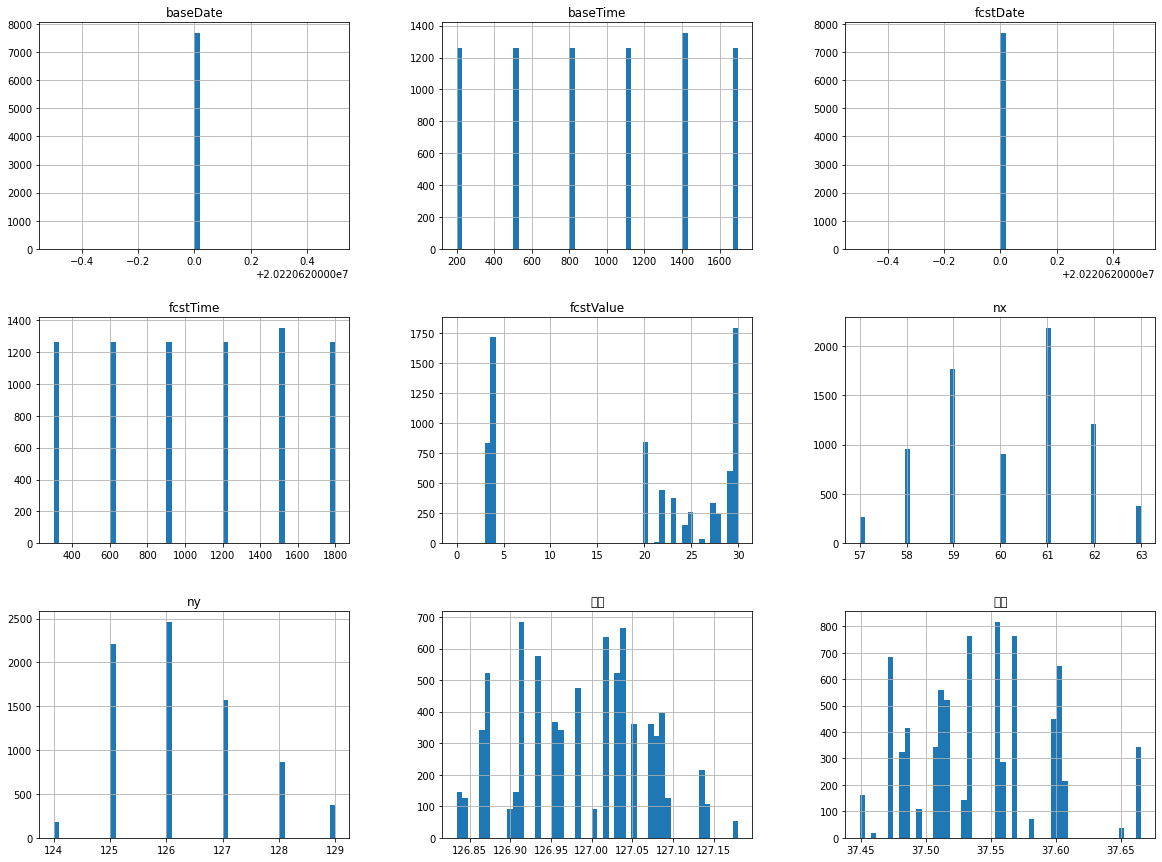

In [50]:
weather_info_df.hist(figsize=(20,15), bins=50)

In [76]:
weather_info_df

baseDate  baseTime category  fcstDate  fcstTime  fcstValue  nx   ny  \
42    20220620       200      POP  20220620       300         20  61  127   
43    20220620       200      TMP  20220620       300         23  61  127   
44    20220620       200      SKY  20220620       300          3  61  127   
54    20220620       200      POP  20220620       300         20  61  127   
55    20220620       200      TMP  20220620       300         23  61  127   
...        ...       ...      ...       ...       ...        ...  ..  ...   
8299  20220620      1700      TMP  20220620      1800         29  63  126   
8300  20220620      1700      SKY  20220620      1800          3  63  126   
8301  20220620      1700      POP  20220620      1800         20  63  126   
8302  20220620      1700      TMP  20220620      1800         29  63  126   
8303  20220620      1700      SKY  20220620      1800          3  63  126   

      자치구          경도         위도  
42    종로구  127.018464  37.567936  
43    종로구  127.018464  37.567936  
44    종로구  127.018464  37.567936  
54    종로구  127.018464  37.567936  
55    종로구  127.018464  37.567936  
...   ...         ...        ...  
8299  송파구  127.136500  37.512589  
8300  송파구  127.136500  37.512589  
8301  송파구  127.136500  37.512589  
8302  송파구  127.136500  37.512589  
8303  송파구  127.136500  37.512589  

[7668 rows x 11 columns]

In [82]:
import folium

lat = '37.54723017686778'
long = '126.99171024973694'
m = folium.Map(location=[lat, long], zoom_start=12, tiles="Stamen Toner")

geo_path = './seoul_municipalities_geo_simple.json'
print(geo_path)


import json
geo_json = json.load(open(geo_path, encoding="utf-8"))

folium.GeoJson(
    geo_json,
    name='seoul_municipalities'
).add_to(m)

for bst in tqdm(weather_info_df.index, ncols=110) :
    
    row = weather_info_df.loc[bst]
    
    if pd.isnull(row['위도']) & pd.isnull(row['경도']) :
        continue
    else :
        if (row['baseTime'] == 200) & (row['category']=='POP') :
            color = 'dimgray'
            folium.Circle(
                radius=int(row['fcstValue'])*40,
                location=[row["위도"], row["경도"]],
                # tooltip= str(row["spot_name"]) + " : "+ row["reservable_count"] +"/ "+ row['reservable_all_count'],
                color=color,
                fill=False).add_to(m)
        elif (row['baseTime'] == 500) & (row['category']=='POP') :
            color = 'gainsboro'
            folium.Circle(
                radius=int(row['fcstValue'])*40,
                location=[row["위도"], row["경도"]],
                # tooltip= str(row["spot_name"]) + " : "+ row["reservable_count"] +"/ "+ row['reservable_all_count'],
                color=color,
                fill=False).add_to(m)
        elif (row['baseTime'] == 800) & (row['category']=='POP') :
            # print('else >>>>',row["위도"], row["경도"])
            color = 'white'
            folium.Circle(
                radius=int(row['fcstValue'])*40,
                location=[row["위도"], row["경도"]],
                # tooltip= str(row["spot_name"]) + " : "+ row["reservable_count"] +"/ "+ row['reservable_all_count'],
                color=color,
                fill=False).add_to(m)
            
        # for i in baseTime_list :
            
            # if (i == 200) & (row['category']=='POP') :
            #     # print(row[''])
            #     print(row['baseTime'])
            #     color = 'dimgray'
            #     folium.Circle(
            #         radius=int(row['fcstValue'])*100,
            #         location=[row["위도"], row["경도"]],
            #         # tooltip= str(row["spot_name"]) + " : "+ row["reservable_count"] +"/ "+ row['reservable_all_count'],
            #         color=color,
            #         fill=False).add_to(m)
            # elif (i == 500) & (row['category']=='POP') :
            #     # print('else >>>>',row["위도"], row["경도"])
            #     color = 'gainsboro'
            #     folium.Circle(
            #         radius=int(row['fcstValue'])*100,
            #         location=[row["위도"], row["경도"]],
            #         # tooltip= str(row["spot_name"]) + " : "+ row["reservable_count"] +"/ "+ row['reservable_all_count'],
            #         color=color,
            #         fill=False).add_to(m)
            # elif (i == 800) & (row['category']=='POP') :
            #      # print('else >>>>',row["위도"], row["경도"])
            #     color = 'white'
            #     folium.Circle(
            #         radius=int(row['fcstValue'])*100,
            #         location=[row["위도"], row["경도"]],
            #         # tooltip= str(row["spot_name"]) + " : "+ row["reservable_count"] +"/ "+ row['reservable_all_count'],
            #         color=color,
            #         fill=False).add_to(m)
            # elif (i == 1100) & (row['category']=='POP') :
            #      # print('else >>>>',row["위도"], row["경도"])
            #     color = 'pink'
            #     folium.Circle(
            #         radius=int(row['fcstValue'])*100,
            #         location=[row["위도"], row["경도"]],
            #         # tooltip= str(row["spot_name"]) + " : "+ row["reservable_count"] +"/ "+ row['reservable_all_count'],
            #         color=color,
            #         fill=False).add_to(m)
            # elif (i == 1400) & (row['category']=='POP') :
            #      # print('else >>>>',row["위도"], row["경도"])
            #     color = 'deeppink'
            #     folium.Circle(
            #         radius=int(row['fcstValue'])*100,
            #         location=[row["위도"], row["경도"]],
            #         # tooltip= str(row["spot_name"]) + " : "+ row["reservable_count"] +"/ "+ row['reservable_all_count'],
            #         color=color,
            #         fill=False).add_to(m)
            # elif (i == 1700) & (row['category']=='POP') :
            #      # print('else >>>>',row["위도"], row["경도"])
            #     color = 'red'
            #     folium.Circle(
            #         radius=int(row['fcstValue'])*100,
            #         location=[row["위도"], row["경도"]],
            #         # tooltip= str(row["spot_name"]) + " : "+ row["reservable_count"] +"/ "+ row['reservable_all_count'],
            #         color=color,
            #         fill=False).add_to(m)
        
folium.LayerControl().add_to(m)

m

./seoul_municipalities_geo_simple.json


100%|███████████████████████████████████████████████████████████████████| 7668/7668 [00:01<00:00, 4712.74it/s]


<AxesSubplot:xlabel='위도', ylabel='경도'>

<Figure size 1440x720 with 0 Axes>

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 44221 missing from curre

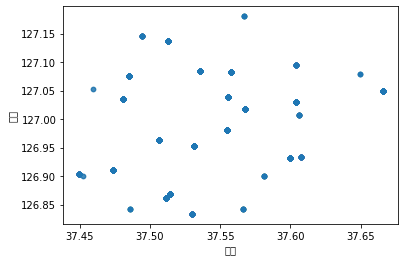

In [58]:
plt.figure(figsize=(20,10))
weather_info_df.plot(kind='scatter', x='위도', y='경도', alpha=0.09)

# 최종적으로 일자별 날씨와 시간에 따른 쏘카 그린카 수요 예측 